# Taller de Automatización de Procesos con Python

## Introducción a Pandas

### GitHub repository: https://github.com/jorgemauricio/automatizacion_python

### Instructor: Jorge Mauricio

### Base de datos: Stanford Open Policing Project ([Montana](https://openpolicing.stanford.edu/data)) 

In [1]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/Montana.csv", low_memory=False)

In [3]:
# estructura del dataFrame Montana
df.head()

id state   stop_date stop_time location_raw      county_name  \
0  MT-2009-00001    MT  2009-01-01     02:10      CASCADE   Cascade County   
1  MT-2009-00002    MT  2009-01-02     11:34     MISSOULA  Missoula County   
2  MT-2009-00003    MT  2009-01-03     11:36     MISSOULA  Missoula County   
3  MT-2009-00004    MT  2009-01-04     10:33     MISSOULA  Missoula County   
4  MT-2009-00005    MT  2009-01-04     10:46     MISSOULA  Missoula County   

   county_fips        fine_grained_location  police_department driver_gender  \
0      30013.0            US 89 N MM10 (SB)                NaN             F   
1      30063.0  HWY 93 SO AND ANNS LANE S/B                NaN             M   
2      30063.0        P007 HWY 93 MM 77 N/B                NaN             M   
3      30063.0        P007 HWY 93 MM 81 S/B                NaN             F   
4      30063.0        P007 HWY 93 MM 81 N/B                NaN             M   

              ...                     lon  ethnicity city out_of_state  \
0             ...             -111.802932          N  NaN        False   
1             ...             -114.081142          N  NaN        False   
2             ...             -114.073505          N  NaN        False   
3             ...             -114.079027        NaN  NaN        False   
4             ...             -114.079150        NaN  NaN        False   

  vehicle_year vehicle_make  vehicle_model  vehicle_style search_reason  \
0         1994         FORD       EXPLORER  SPORT UTILITY           NaN   
1         1996          GMC             TK          TRUCK           NaN   
2         1999          GMC          YUKON  SPORT UTILITY           NaN   
3         2002         HOND           CR-V  SPORT UTILITY           NaN   
4         1992         TOYT         TERCEL          SEDAN           NaN   

             stop_outcome_raw  
0    TRAFFIC CITATION,WARNING  
1  INFFRACTION ARREST,WARNING  
2          INFFRACTION ARREST  
3          INFFRACTION ARREST  
4          INFFRACTION ARREST  

[5 rows x 33 columns]

In [4]:
# cantidad de columnas y filas
df.shape

(825118, 33)

In [5]:
# tipos de datos de cada columna
df.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department        float64
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found          object
stop_outcome              object
is_arrested                 bool
lat                      float64
lon                      float64
ethnicity                 object
city                      object
out_of_state              object
vehicle_year              object
vehicle_make              object
vehicle_model             object
vehicle_st

In [6]:
# contabilizar los valores nulos
df.isnull().sum()

id                            0
state                         0
stop_date                    11
stop_time                    11
location_raw                  4
county_name                4056
county_fips                4056
fine_grained_location      3741
police_department        825118
driver_gender               119
driver_age_raw                0
driver_age                 3480
driver_race_raw             106
driver_race                2739
violation_raw                73
violation                    73
search_conducted              0
search_type_raw          822092
search_type              822092
contraband_found           3026
stop_outcome                 53
is_arrested                   0
lat                         436
lon                         436
ethnicity                    98
city                     549630
out_of_state               4699
vehicle_year               6610
vehicle_make               4268
vehicle_model             23801
vehicle_style             65362
search_r

## Remover columnas que solo contienen valores nulos

In [7]:
# eliminar la columna de "police_department"
df.drop("police_department", axis="columns", inplace=True)

In [8]:
# contabilizar columnas y filas
df.shape

(825118, 32)

In [9]:
# checar columnas
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'lat',
       'lon', 'ethnicity', 'city', 'out_of_state', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'vehicle_style', 'search_reason',
       'stop_outcome_raw'],
      dtype='object')

In [10]:
# método alternativo
df.dropna(axis='columns', how='all').shape

(825118, 32)

NOTA: 
- Existe más de una forma de eliminar datos nulos
- Verificar los argumentos de cada método

## ¿Qué genero es detenido más por exceso de velocidad?

In [11]:
# Número de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'Speeding']["driver_gender"].value_counts()

M    225327
F    111598
Name: driver_gender, dtype: int64

In [12]:
# Porcentaje de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'Speeding']["driver_gender"].value_counts(normalize=True)

M    0.668775
F    0.331225
Name: driver_gender, dtype: float64

In [13]:
# forma alternativa
df.loc[df["violation"] == 'Speeding', "driver_gender"].value_counts(normalize=True)

M    0.668775
F    0.331225
Name: driver_gender, dtype: float64

In [14]:
# cuando un hombre es detenido, que porcentaje es por exceso de velocidad?
df[df['driver_gender'] == "M"]["violation"].value_counts(normalize=True)

Speeding                                                0.404612
License,Speeding                                        0.066251
Paperwork,Speeding                                      0.053619
Lights                                                  0.050501
License,Paperwork,Speeding                              0.032053
Safe movement                                           0.031704
License                                                 0.024793
Seat belt,Speeding                                      0.021553
Registration/plates                                     0.018569
License,Lights                                          0.014628
Truck                                                   0.012943
Stop sign/light                                         0.012774
Other                                                   0.011884
License,Paperwork                                       0.011009
Lights,Paperwork                                        0.009154
Equipment,Speeding       

In [15]:
# cuando una mujer es detenida, que porcentaje es por exceso de velocidad?
df[df['driver_gender'] == "F"]["violation"].value_counts(normalize=True)

Speeding                                             0.416364
License,Speeding                                     0.080838
Paperwork,Speeding                                   0.062131
Lights                                               0.054774
License,Paperwork,Speeding                           0.040507
Safe movement                                        0.031616
License                                              0.025337
Registration/plates                                  0.021061
Seat belt,Speeding                                   0.016674
License,Lights                                       0.016021
Stop sign/light                                      0.015383
License,Paperwork                                    0.013107
Lights,Paperwork                                     0.010626
License,Lights,Paperwork                             0.009659
Other                                                0.009301
Paperwork,Seat belt,Speeding                         0.007208
License,

In [16]:
# porcentaje agrupado por genero
df.groupby("driver_gender")["violation"].value_counts(normalize=True)

driver_gender  violation                                           
F              Speeding                                                0.416364
               License,Speeding                                        0.080838
               Paperwork,Speeding                                      0.062131
               Lights                                                  0.054774
               License,Paperwork,Speeding                              0.040507
               Safe movement                                           0.031616
               License                                                 0.025337
               Registration/plates                                     0.021061
               Seat belt,Speeding                                      0.016674
               License,Lights                                          0.016021
               Stop sign/light                                         0.015383
               License,Paperwork                    

In [17]:
# año con el número mayor de detenciones
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'lat',
       'lon', 'ethnicity', 'city', 'out_of_state', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'vehicle_style', 'search_reason',
       'stop_outcome_raw'],
      dtype='object')

In [18]:
# combinar celdas de fecha y tiempo
combined = df["stop_date"] + " " + df['stop_time']

In [19]:
# convertir a columna de tiempo
df['fecha'] = pd.to_datetime(combined)

In [20]:
# corroborar tipo de dato de la columna
df.dtypes

id                               object
state                            object
stop_date                        object
stop_time                        object
location_raw                     object
county_name                      object
county_fips                     float64
fine_grained_location            object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                   bool
search_type_raw                  object
search_type                      object
contraband_found                 object
stop_outcome                     object
is_arrested                        bool
lat                             float64
lon                             float64
ethnicity                        object
city                             object


In [21]:
# año con mayor número de detenciones
df['fecha'].dt.year.value_counts()

2010.0    124285
2011.0    122839
2012.0    117487
2015.0    115935
2013.0    114283
2014.0    109747
2016.0    102097
2009.0     18434
Name: fecha, dtype: int64

In [22]:
# mes con mayor número de detenciones del 2010
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts()

9     13137
8     12421
7     12271
5     11953
10    11791
3     10650
6     10568
4     10279
2      9084
11     7882
1      7321
12     6928
Name: fecha, dtype: int64

In [23]:
# ordenar datos por índice
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index()

1      7321
2      9084
3     10650
4     10279
5     11953
6     10568
7     12271
8     12421
9     13137
10    11791
11     7882
12     6928
Name: fecha, dtype: int64

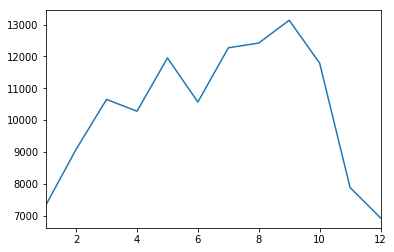

In [24]:
# gráficar los datos (línea)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot()

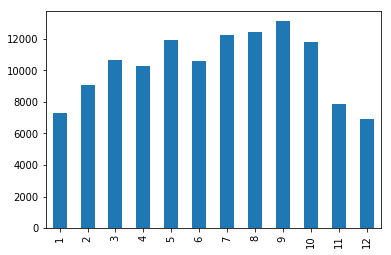

In [25]:
# gráficar los datos (barra)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="bar")

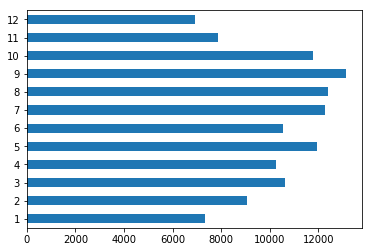

In [26]:
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

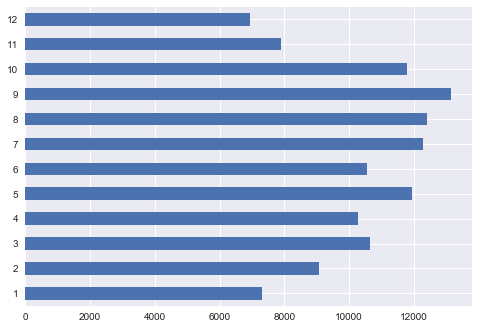

In [27]:
# aplicando estilo
plt.style.use("seaborn")
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

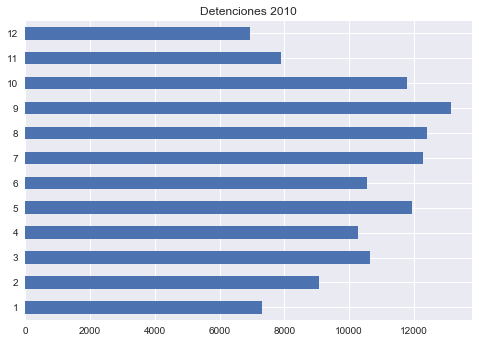

In [28]:
# gráficar los datos (barra y título)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh", title="Detenciones 2010")

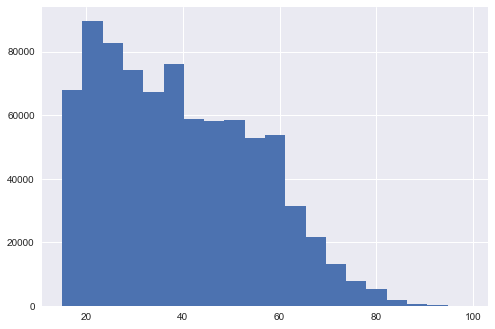

In [29]:
# histograma de edades
df['driver_age'].hist(bins=20)

# Introducción a Matplotlib

### Instalación

`conda install matplotlib`

Matplotlib nos permite reproducir graficas programaticamente. como recomencion pueden checar la pagina oficial de Matplotlib en http://matplotlib.org/

In [30]:
# librería
import matplotlib.pyplot as plt

In [31]:
# para visualizar las gráficas en línea ocupamos el siguiente código:
%matplotlib inline

### Ejemplo básico

In [32]:
# Utilizando dos arreglos de numpy, podemos generar una grafica
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

### Comandos básicos de matplotlib
Podemos crear una simple grafica de linea utilizando los siguientes comandos

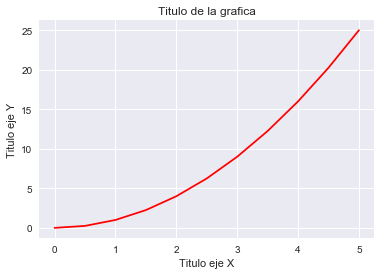

In [33]:
plt.plot(x, y, 'r') # 'r' es el color rojo
plt.xlabel('Titulo eje X')
plt.ylabel('Titulo eje Y')
plt.title('Titulo de la grafica')
plt.show()

### Crear varias gráficas en el mismo espacio

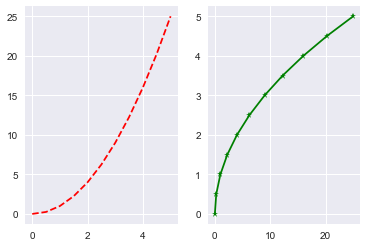

In [34]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # Opciones de color
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')

## Matplotlib orientado a objetos

### Introduccion al metodo orientado a objetos

El propósito de utilizar un método orientado a objeto es generar un objeto figura y de ahí solo mandar llamar los métodos o atributos del objeto. Este método es más efectivo al momento de manipular varias gráficas

Comencemos creando la instancia de figura. Posteriormente crearemos los ejes

Text(0.5,1,'Titulo')

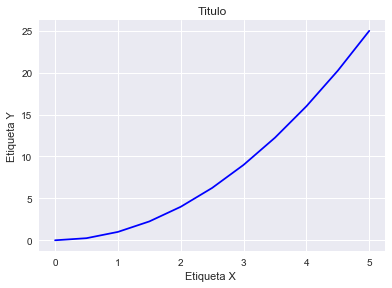

In [35]:
# Crear Figura (espacio vacio)
fig = plt.figure()

# Agregar ejes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # izquierda, abajo, ancho, alto (rango de 0 a 1)

# Graficar los ejes
axes.plot(x, y, 'b')
axes.set_xlabel('Etiqueta X ') # Utilizamos set_ al principio de los metodos
axes.set_ylabel('Etiqueta Y')
axes.set_title('Titulo')

**NOTA:** El código es un poco más complicado, pero tiene la ventaja de que tenemos el control de donde colocar las gráficas.

Text(0.5,1,'Eje 2 Título')

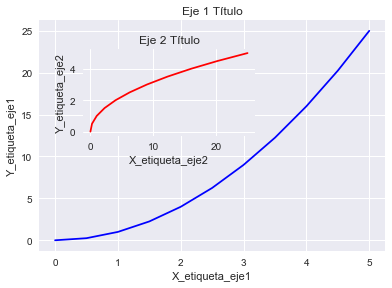

In [36]:
# Crear espacio en blanco
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # ejes principales (x,y, ancho, alto)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # ejes insertados (x,y, ancho, alto)

# Figura grande eje 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_etiqueta_eje1')
axes1.set_ylabel('Y_etiqueta_eje1')
axes1.set_title('Eje 1 Título')

# Figura insertada eje 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_etiqueta_eje2')
axes2.set_ylabel('Y_etiqueta_eje2')
axes2.set_title('Eje 2 Título')

### subplots()

El objeto plt.subplots() actuara como un manejador automatico de ejes

Uso basico:

Text(0.5,1,'Título')

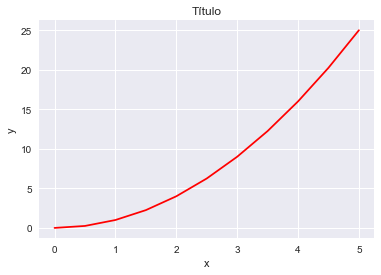

In [37]:
# Usamos una sintaxis similar a plt.figure() excepto que utilizamos una tupla para tomar los valores de fig y axes
fig, axes = plt.subplots()

# Utilizamos el objeto axes para agregar las graficas
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título')

**NOTA:** De esta manera se puede  especificar el numero de filas y columnas a crear al momento de crear el objeto

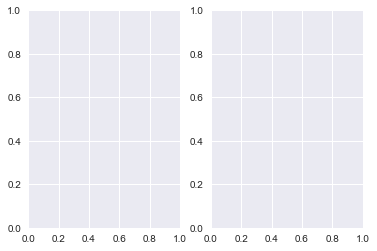

In [38]:
# Espacio vacio de 1 por 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [39]:
# Los ejes es un arreglo de ejes donde se puede graficar
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f32a9b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f416c88>], dtype=object)

## Figure size, aspect ratio and DPI

Matplotlib permite el uso de aspect ratio, DPI and figure size para ser especificado al momento de crear el objeto. Podemos utilizar ** `figsize` ** y ** `dpi` ** comandos
* `figsize:` es una tupla que nos permite determinar el ancho y la altura de la figura en pulgadas
* `dpi:` son los puntos por pulgada (pixel per inch). 

Por ejemplo:

In [40]:
fig = plt.figure(figsize=(8,4), dpi=100)

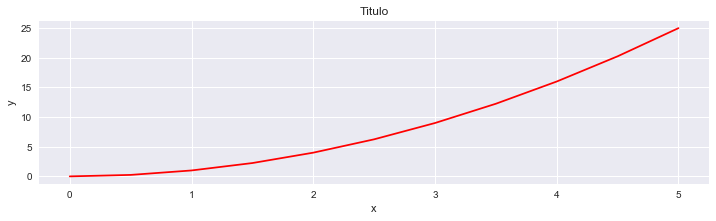

In [41]:
# Estos argumentos se pueden pasar al administrador del layout como una funcion subplots:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Titulo');

### Guardar figuras
Matplotlib puede generar imagenes de alta calidad, incluyendo PNG, JPG, EPS, SVG, PGF and PDF.

Para guardar la figura en un archivo utilizamos el metodo ** `savefig`** en la clase ** `Figure` **:

In [42]:
# guardar la imagen como png
fig.savefig("NombreDelArchivo.png")

In [43]:
# En este metodo podemos opcionalmente especificar el DPI y seleccionar los diferentes formatos:
fig.savefig("NombreDelArchivo.png", dpi=200)

## Legendas, etiquetas y titulos
Ahora que ya tenemos una idea de lo basico al momento de crear una figura, vamos a ver como podemos decorar nuestras gráficas.

### Título de la figura

Un titulo puede ser agregado a cada eje de la figura para emplearlo utiliza el metodo ** `set_title` **:

        ax.set_title("title");

### Etiquetas de los ejes

Igual que con los metodos ** `set_xlabel` ** y ** `set_ylabel` ** podemos agregar etiquetas para X y Y

        ax.set_xlabel("x")
        ax.set_ylabel("y");

### Legendas
Se puede utilizar el metodo **legend** para mostrar los elementos de la figura

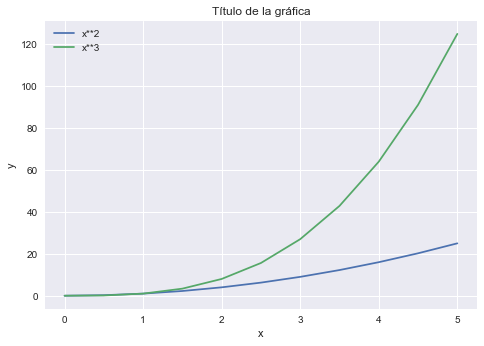

In [47]:
# declarar la figura
fig = plt.figure()

# declarar el eje
ax = fig.add_axes([0,0,1,1])

# título
ax.set_title("Título de la gráfica");

# títulos ejes
ax.set_xlabel("x")
ax.set_ylabel("y");

# configurar cada una de las líneas
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

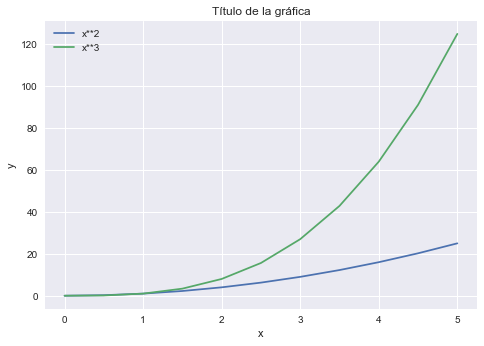

In [48]:
# Si deseamos colocar la leyenda a nuestro gusto podemos utilizar los siguientes atributos

# Opciones
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner


# La opcion mas comun
ax.legend(loc=0) # Matplotlib decide por default
fig

### Ajustar colores, tipo y tamano de linea

Matplotlib permite modificar a modo los colores el tipo y tamano de linea

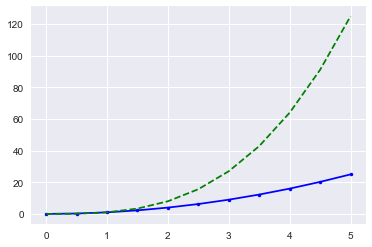

In [49]:
# MATLAB Sintaxis
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # linea azul con puntos
ax.plot(x, x**3, 'g--') # linea verde de lineas

### Colores con el parametro color= parameter
Podemos definir los colores por medio de sus nombres o los codigos RGB hex y opcionalmente proporcionar un valor alpha con los metodos `color` y `alpha`. Alpha indica la opacidad.


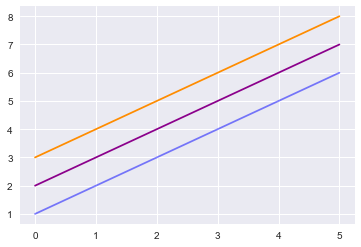

In [50]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # medio transparente
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Grid
Utilizando el método de `grid` podemos activar o desactivar  las líneas de la malla, para una mejor visualización de los datos.

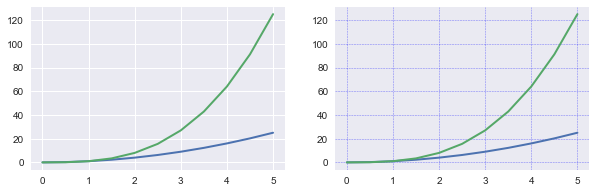

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Doble eje
A veces se requiere utilizar dos ejes de datos. Ejemplo cuando tenemos curvas con diferentes unidades. En este caso en particular utilizaremos los métodos de `twinx` y `twiny`

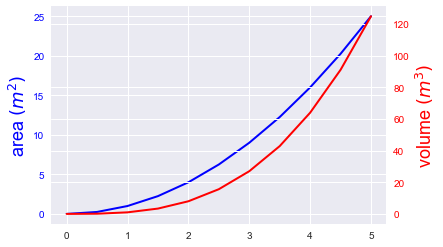

In [52]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Anotación de Texto
Para agregar un texto sobre una gráfica en matplotlib se puede lograr mediante el uso del método `text`.

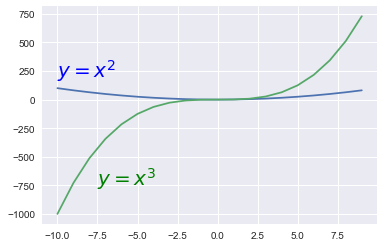

In [68]:
fig, ax = plt.subplots()

x = np.arange(-10,10)

ax.plot(x, x**2, x, x**3)

ax.text(-10, 200, r"$y=x^2$", fontsize=20, color="blue")
ax.text(-7.5, -750, r"$y=x^3$", fontsize=20, color="green");

## Gráficas especiales
Existen diferentes típos de gráficas: Barra, histogramas, Puntos y más

### Línea

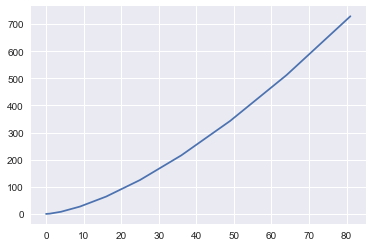

In [76]:
x = np.arange(10) ** 2
y = np.arange(10) ** 3
plt.plot(x,y)

### Puntos (Scatter)

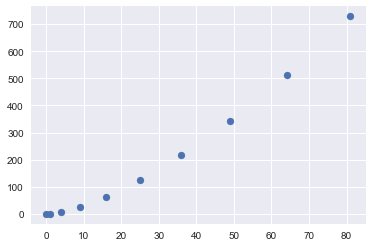

In [78]:
plt.scatter(x,y)

### Barras (Bar)

<Container object of 10 artists>

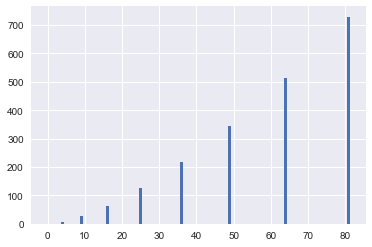

In [79]:
plt.bar(x,y)

In [81]:
## Ejercicio Gráficas

In [ ]:
# leer dataframe
df = pd.read_csv("data/estado1_5.csv")

In [ ]:
# estructura del df
df.head()

In [ ]:
# información del df
df.info()

In [ ]:
# crear columna de tiempo
df["fecha_f"] = pd.to_datetime(df['fecha'])

In [ ]:
# crear la figura para la gráfica
fig = plt.figure()
ax = fig.add_subplot(111)

In [ ]:
# configurar tamaño de la gráfica
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)